In [1]:
%matplotlib inline

In [2]:
# !pyflakes PSR_J1826-1256_cntrp.py

In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
from feupy.target import Target
from feupy.roi import ROI

from feupy.analysis import CounterpartsAnalysisConfig as AnalysisConfig
from feupy.analysis import CounterpartsAnalysis as Analysis

from feupy.scripts import gammapy_catalogs 

from feupy.catalog.pulsar.atnf import SourceCatalogATNF
from feupy.catalog.hawc import SourceCatalogExtraHAWC
from feupy.catalog.lhaaso import SourceCatalogPublishNatureLHAASO
from feupy.utils.scripts import pickling, unpickling

from astropy import units as u

from gammapy.modeling.models import ExpCutoffPowerLawSpectralModel

from pathlib import Path

import matplotlib.pyplot as plt 
from feupy.plotters import *

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,int64,float64,float64,bool,bool,str1
spectral,index,1.5000e+00,,0.000e+00,nan,nan,False,False,
spectral,amplitude,1.0000e-12,TeV-1 s-1 cm-2,0.000e+00,nan,nan,False,True,
spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,
spectral,lambda_,1.0000e-01,TeV-1,0.000e+00,nan,nan,False,False,
spectral,alpha,1.0000e+00,,0.000e+00,nan,nan,True,False,


In [5]:
from gammapy.modeling.models import (
#     FoVBackgroundModel,
    Models,
#     PowerLawNormSpectralModel,
    SkyModel,
#     TemplateSpatialModel,
#     create_fermi_isotropic_diffuse_model,
)

from gammapy.datasets import Datasets

In [6]:
from feupy.config import *

def set_leg_style_JCAP(leg_style):
    for name in list(leg_style.keys()):
        if  name.find('LHAASO ') != -1:
            color = COLOR_LHAASO
            marker = MARKER_LHAASO
            leg_style[name] = (color, marker)
            
        if  name.find('CTA ') != -1:
            color = COLOR_CTA
            marker = MARKER_CTA
            leg_style[name] = (color, marker)
        
    return leg_style

In [7]:
path = Path("../analysis")
path.mkdir(parents=True, exist_ok=True)
file_name = path / "counterparts_analysis_config_all"
dict_analysis = unpickling(file_name)

In [8]:
dict_analysis

{'LHAASO J1825-1326': {'HESS J1825-137': {'datasets': [1,
    2,
    6,
    9,
    11,
    14,
    17,
    18],
   'pulsar': 'PSR J1826-1334'},
  'HESS J1826-130': {'datasets': [0, 3, 5, 7, 8, 12, 18],
   'pulsar': 'PSR J1826-1256'}},
 'LHAASO J1839-0545': {'HESS J1837-069': {'datasets': [0, 1, 18, 19],
   'pulsar': 'PSR J1837-0604'},
  'HESS J1841-055': {'datasets': [2, 3, 14, 18], 'pulsar': 'PSR J1838-0537'}}}

In [9]:
source_name = 'LHAASO J1825-1326'
counterpart_TeV_name = "HESS J1826-130"

In [10]:
catalog = SourceCatalogPublishNatureLHAASO()

In [11]:
source = catalog[source_name]

In [12]:
spec_model_cntrp = ExpCutoffPowerLawSpectralModel(
    amplitude=1e-12*u.Unit("TeV-1 cm-2 s-1"),
    index=2,
    lambda_= 0.1*u.Unit("TeV-1"),
    reference=10*u.Unit("TeV"),
    alpha=1.0,
)


In [13]:
models = Models()  # global models object

In [14]:
datasets_name = "likelihood"

model_name = f"{datasets_name} fit-{spec_model_cntrp.tag[1]}"
model = SkyModel(spectral_model=spec_model_cntrp.copy(), name=model_name)
print(model)

SkyModel

  Name                      : likelihood fit-ecpl
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.000   +/-    0.00             
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
    reference             (frozen):     10.000       TeV         
    lambda_                       :      0.100   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   




In [15]:
target = Target(
    name=source.name, 
    pos_ra=source.position.ra, 
    pos_dec=source.position.dec,
    model=model,
)

In [16]:
print(target.model)

SkyModel

  Name                      : likelihood fit-ecpl
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.000   +/-    0.00             
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
    reference             (frozen):     10.000       TeV         
    lambda_                       :      0.100   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   




In [17]:
target.all

[*** Basic parameters ***
 
 name = LHAASO J1825-1326
 pos_ra = 276.45deg
 pos_dec = -13.45deg
 
 *** Model information ***
 
 SkyModel
 
   Name                      : likelihood fit-ecpl
   Datasets names            : None
   Spectral model type       : ExpCutoffPowerLawSpectralModel
   Spatial  model type       : 
   Temporal model type       : 
   Parameters:
     index                         :      2.000   +/-    0.00             
     amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
     reference             (frozen):     10.000       TeV         
     lambda_                       :      0.100   +/-    0.00 1 / TeV     
     alpha                 (frozen):      1.000                   
 ]

In [18]:
radius_roi = 1.0 * u.Unit("deg")  # maximum angle of separation (in degrees)

In [19]:
roi = ROI(target=target, radius=radius_roi)

In [20]:
target.all

[*** Basic parameters ***
 
 name = LHAASO J1825-1326
 pos_ra = 276.45deg
 pos_dec = -13.45deg
 
 *** Model information ***
 
 SkyModel
 
   Name                      : likelihood fit-ecpl
   Datasets names            : None
   Spectral model type       : ExpCutoffPowerLawSpectralModel
   Spatial  model type       : 
   Temporal model type       : 
   Parameters:
     index                         :      2.000   +/-    0.00             
     amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
     reference             (frozen):     10.000       TeV         
     lambda_                       :      0.100   +/-    0.00 1 / TeV     
     alpha                 (frozen):      1.000                   
 ]

In [21]:
e_ref_min = 100 * u.Unit("GeV")

In [22]:
analysis_confg = AnalysisConfig(roi, e_ref_min=e_ref_min)

In [23]:
target.all

[*** Basic parameters ***
 
 name = LHAASO J1825-1326
 pos_ra = 276.45deg
 pos_dec = -13.45deg
 
 *** Model information ***
 
 SkyModel
 
   Name                      : likelihood fit-ecpl
   Datasets names            : None
   Spectral model type       : ExpCutoffPowerLawSpectralModel
   Spatial  model type       : 
   Temporal model type       : 
   Parameters:
     index                         :      2.000   +/-    0.00             
     amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
     reference             (frozen):     10.000       TeV         
     lambda_                       :      0.100   +/-    0.00 1 / TeV     
     alpha                 (frozen):      1.000                   
 ]

In [24]:
analysis_confg.energy_range

[<Quantity 0.1 TeV>, None]

In [25]:
analysis_confg.target

*** Basic parameters ***

name = LHAASO J1825-1326
pos_ra = 276.45deg
pos_dec = -13.45deg

*** Model information ***

SkyModel

  Name                      : likelihood fit-ecpl
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.000   +/-    0.00             
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
    reference             (frozen):     10.000       TeV         
    lambda_                       :      0.100   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   


In [26]:
analysis_confg.target.name

'LHAASO J1825-1326'

In [27]:
print(analysis_confg.target.info)

*** Basic parameters ***

name = LHAASO J1825-1326
pos_ra = 276.45deg
pos_dec = -13.45deg

*** Model information ***

SkyModel

  Name                      : likelihood fit-ecpl
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.000   +/-    0.00             
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
    reference             (frozen):     10.000       TeV         
    lambda_                       :      0.100   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   




In [28]:
analysis = Analysis(analysis_confg)

In [29]:
analysis.catalogs

In [30]:
target.all

[*** Basic parameters ***
 
 name = LHAASO J1825-1326
 pos_ra = 276.45deg
 pos_dec = -13.45deg
 
 *** Model information ***
 
 SkyModel
 
   Name                      : likelihood fit-ecpl
   Datasets names            : None
   Spectral model type       : ExpCutoffPowerLawSpectralModel
   Spatial  model type       : 
   Temporal model type       : 
   Parameters:
     index                         :      2.000   +/-    0.00             
     amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
     reference             (frozen):     10.000       TeV         
     lambda_                       :      0.100   +/-    0.00 1 / TeV     
     alpha                 (frozen):      1.000                   
 ]

In [31]:
# (analysis.catalogs[3].table)

In [32]:
analysis.run()

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


The error is: (2HWC J1825-134) 'SourceCatalogObject2HWC' object has no attribute 'flux_points'
The error is: (3FGL J1823.2-1339) index -1 is out of bounds for axis 0 with size 0
The error is: (3FGL J1824.5-1351e) index -1 is out of bounds for axis 0 with size 0
The error is: (3FGL J1826.1-1256) index -1 is out of bounds for axis 0 with size 0


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point 

The error is: (3HWC J1825-134) 'SourceCatalogObject3HWC' object has no attribute 'flux_points'


No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


Total number of gamma sources: 19
Total number of flux points tables: 19
Total number of pulsars: 9


In [33]:
len(analysis.datasets)

19

In [34]:
print(analysis.models)

Models

Component 0: SkyModel

  Name                      : HESS_J1826-130_gamma-cat_ecpl
  Datasets names            : HESS J1826-130: gamma-cat
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      1.610   +/-    0.11             
    amplitude                     :   8.62e-13   +/- 7.3e-14 1 / (TeV s cm2)
    reference             (frozen):      1.000       TeV         
    lambda_                       :      0.080   +/-    0.03 1 / TeV     
    alpha                 (frozen):      1.000                   

Component 1: SkyModel

  Name                      : HESS_J1825-137_gamma-cat_ecpl
  Datasets names            : HESS J1825-137: gamma-cat
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.260   +/-    0.03             
    ampl

In [35]:
datasets_names = analysis.datasets.names
models_names = analysis.datasets.models.names

In [36]:
for pulsar in analysis.pulsars:
    name = pulsar.name
    datasets_names.append(name)

In [37]:
leg_style = set_leg_style(
    leg_style ={}, 
    datasets_names=datasets_names, 
    models_names=models_names
)

In [38]:
leg_style

{'HESS J1826-130: gamma-cat': ('aqua', 's'),
 'HESS J1825-137: gamma-cat': ('fuchsia', 'o'),
 'HESS J1825-137: hgps': ('peru', 's'),
 'HESS J1826-130: hgps': ('brown', 'o'),
 '4FGL J1823.3-1340': ('chartreuse', 's'),
 '4FGL J1824.1-1304': ('chocolate', 'o'),
 '4FGL J1824.4-1350e': ('coral', 's'),
 '4FGL J1826.1-1256': ('khaki', 'o'),
 '4FGL J1828.1-1312': ('darkblue', 's'),
 '2FHL J1824.5-1350e': ('cadetblue', 'o'),
 '3FHL J1823.3-1339': ('pink', 's'),
 '3FHL J1824.5-1351e': ('indigo', 'o'),
 '3FHL J1826.1-1256': ('seagreen', 's'),
 '2HWC J1825-134': ('crimson', 'o'),
 'HAWC J1825-138': ('khaki', 's'),
 'HAWC J1826-128': ('darkmagenta', 'o'),
 'HAWC J1825-134': ('orange', 's'),
 'eHWC J1825-134': ('springgreen', 'o'),
 'LHAASO J1825-1326': ('plum', 's'),
 'PSR J1822-1252': ('maroon', 'o'),
 'PSR J1822-1400': ('navy', 's'),
 'PSR J1823-1347': ('olive', 'o'),
 'PSR J1824-1350': ('skyblue', 's'),
 'PSR J1824-1423': ('orange', 'o'),
 'PSR J1826-1256': ('orangered', 's'),
 'PSR J1826-1334':

In [39]:
leg_style = set_leg_style_JCAP(leg_style)

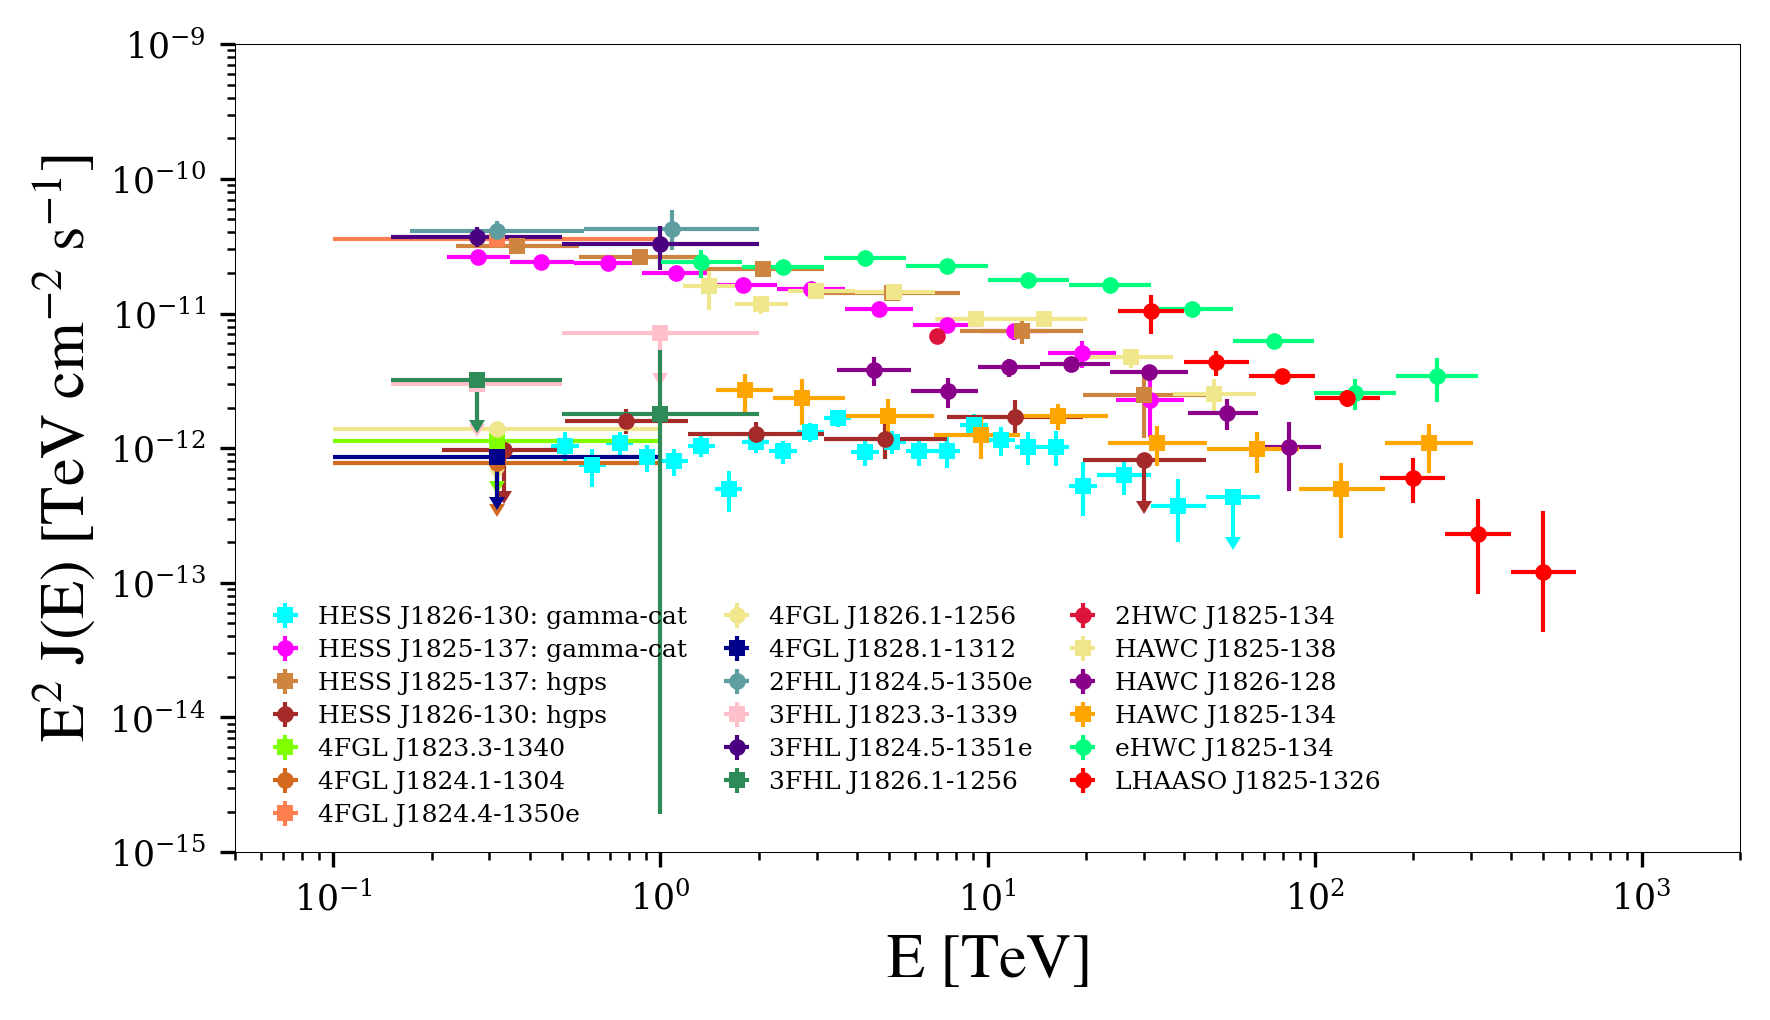

In [40]:
plot_limits = dict(
    energy_bounds = [5e-2, 2e3] * u.TeV,
    ylim = [1e-15, 1e-9]
)
show_SED(
    datasets=analysis.datasets, 
#     models=analysis.models,
    leg_style=leg_style,
    plot_limits=plot_limits)

In [41]:
len(analysis.datasets)

19

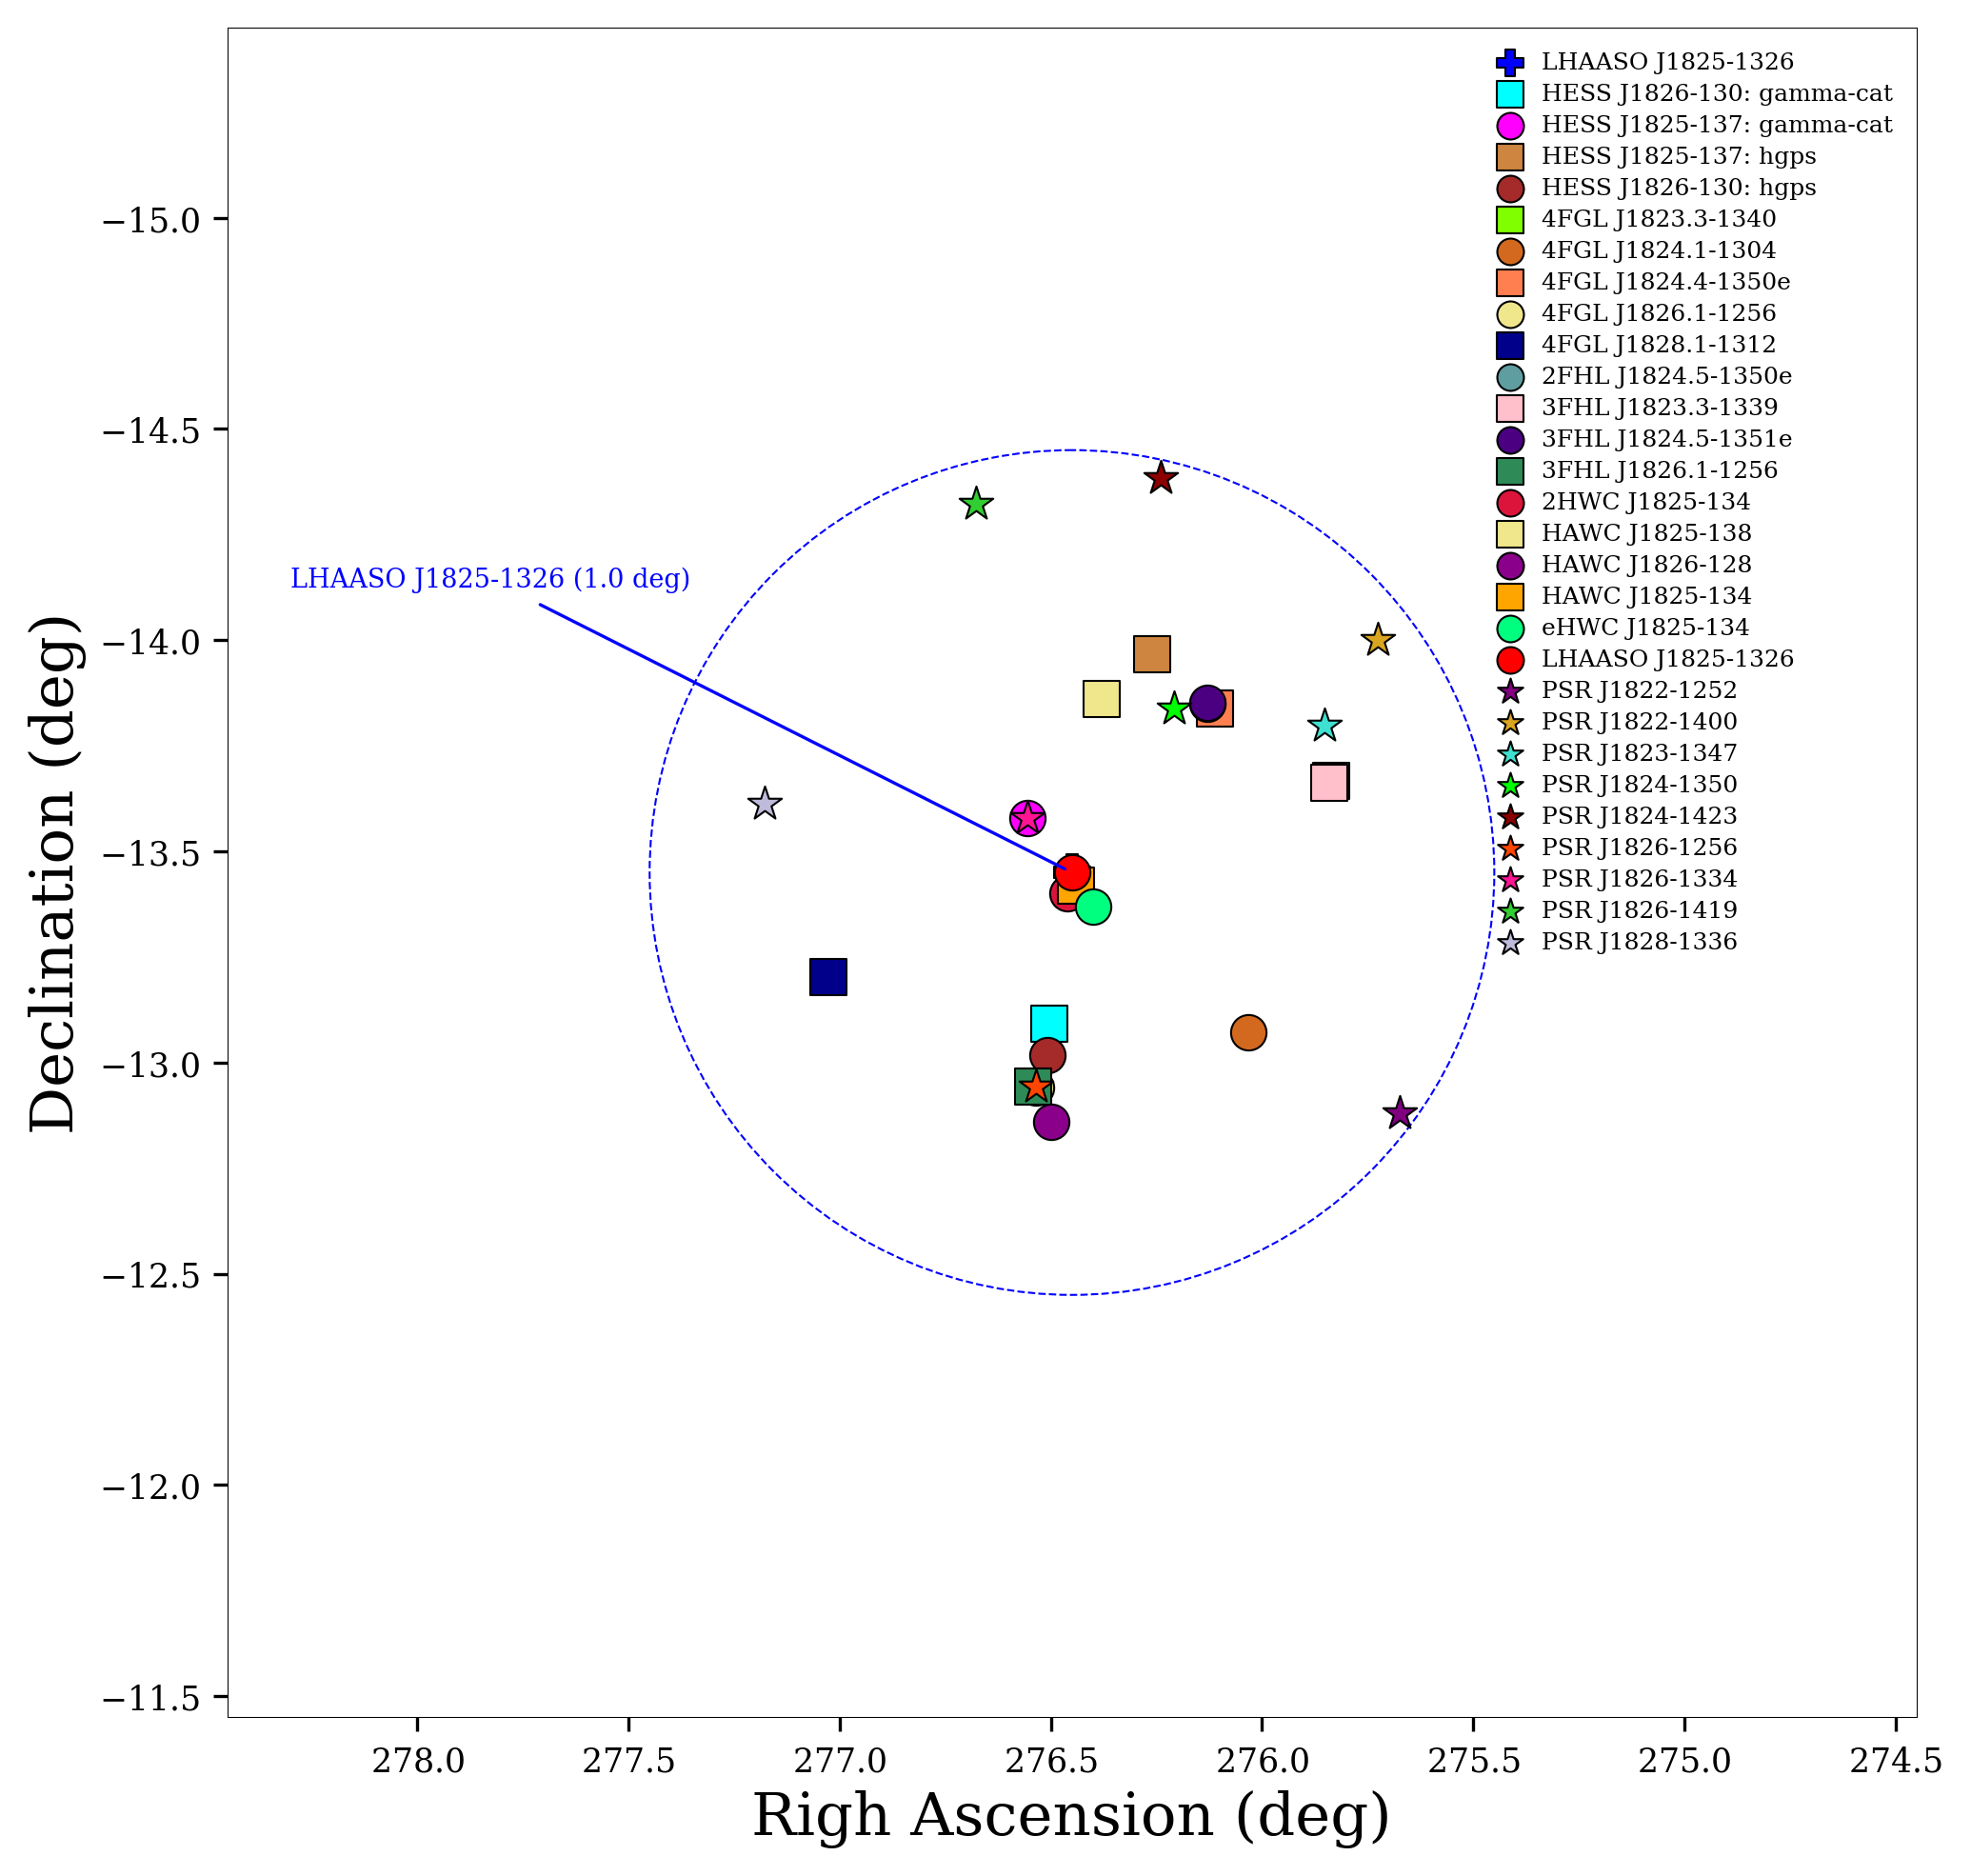

In [42]:
show_sky_map(name=analysis.config.target.name, 
                  roi=analysis.config.roi,
                  datasets=analysis.datasets, 
                  sources=analysis.sources, 
                  leg_style=leg_style, pulsars=analysis.pulsars
                )  

In [43]:
# analysis.write_datasets()
# datasets = analysis.read_datasets()

In [44]:
datasets = Datasets()
print(datasets_name)
for index in dict_analysis[source_name][counterpart_TeV_name]["datasets"]:
    datasets.append(analysis.datasets[index])
for index, dataset in enumerate(datasets):
    print(f"{index}: {dataset.name}")

likelihood
0: HESS J1826-130: gamma-cat
1: HESS J1826-130: hgps
2: 4FGL J1824.1-1304
3: 4FGL J1826.1-1256
4: 4FGL J1828.1-1312
5: 3FHL J1826.1-1256
6: LHAASO J1825-1326


In [45]:
print(datasets)

Datasets
--------

Dataset 0: 

  Type       : FluxPointsDataset
  Name       : HESS J1826-130: gamma-cat
  Instrument : 
  Models     : ['HESS_J1826-130_gamma-cat_ecpl']

Dataset 1: 

  Type       : FluxPointsDataset
  Name       : HESS J1826-130: hgps
  Instrument : 
  Models     : ['HESS_J1826-130_hgps_pl']

Dataset 2: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1824.1-1304
  Instrument : 
  Models     : ['4FGL_J1824.1-1304_lp']

Dataset 3: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1826.1-1256
  Instrument : 
  Models     : ['4FGL_J1826.1-1256_secpl-4fgl-dr3']

Dataset 4: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1828.1-1312
  Instrument : 
  Models     : ['4FGL_J1828.1-1312_lp']

Dataset 5: 

  Type       : FluxPointsDataset
  Name       : 3FHL J1826.1-1256
  Instrument : 
  Models     : ['3FHL_J1826.1-1256_pl']

Dataset 6: 

  Type       : FluxPointsDataset
  Name       : LHAASO J1825-1326
  Instrument : 
  Models     : ['LHAASO_J1825-1326_l

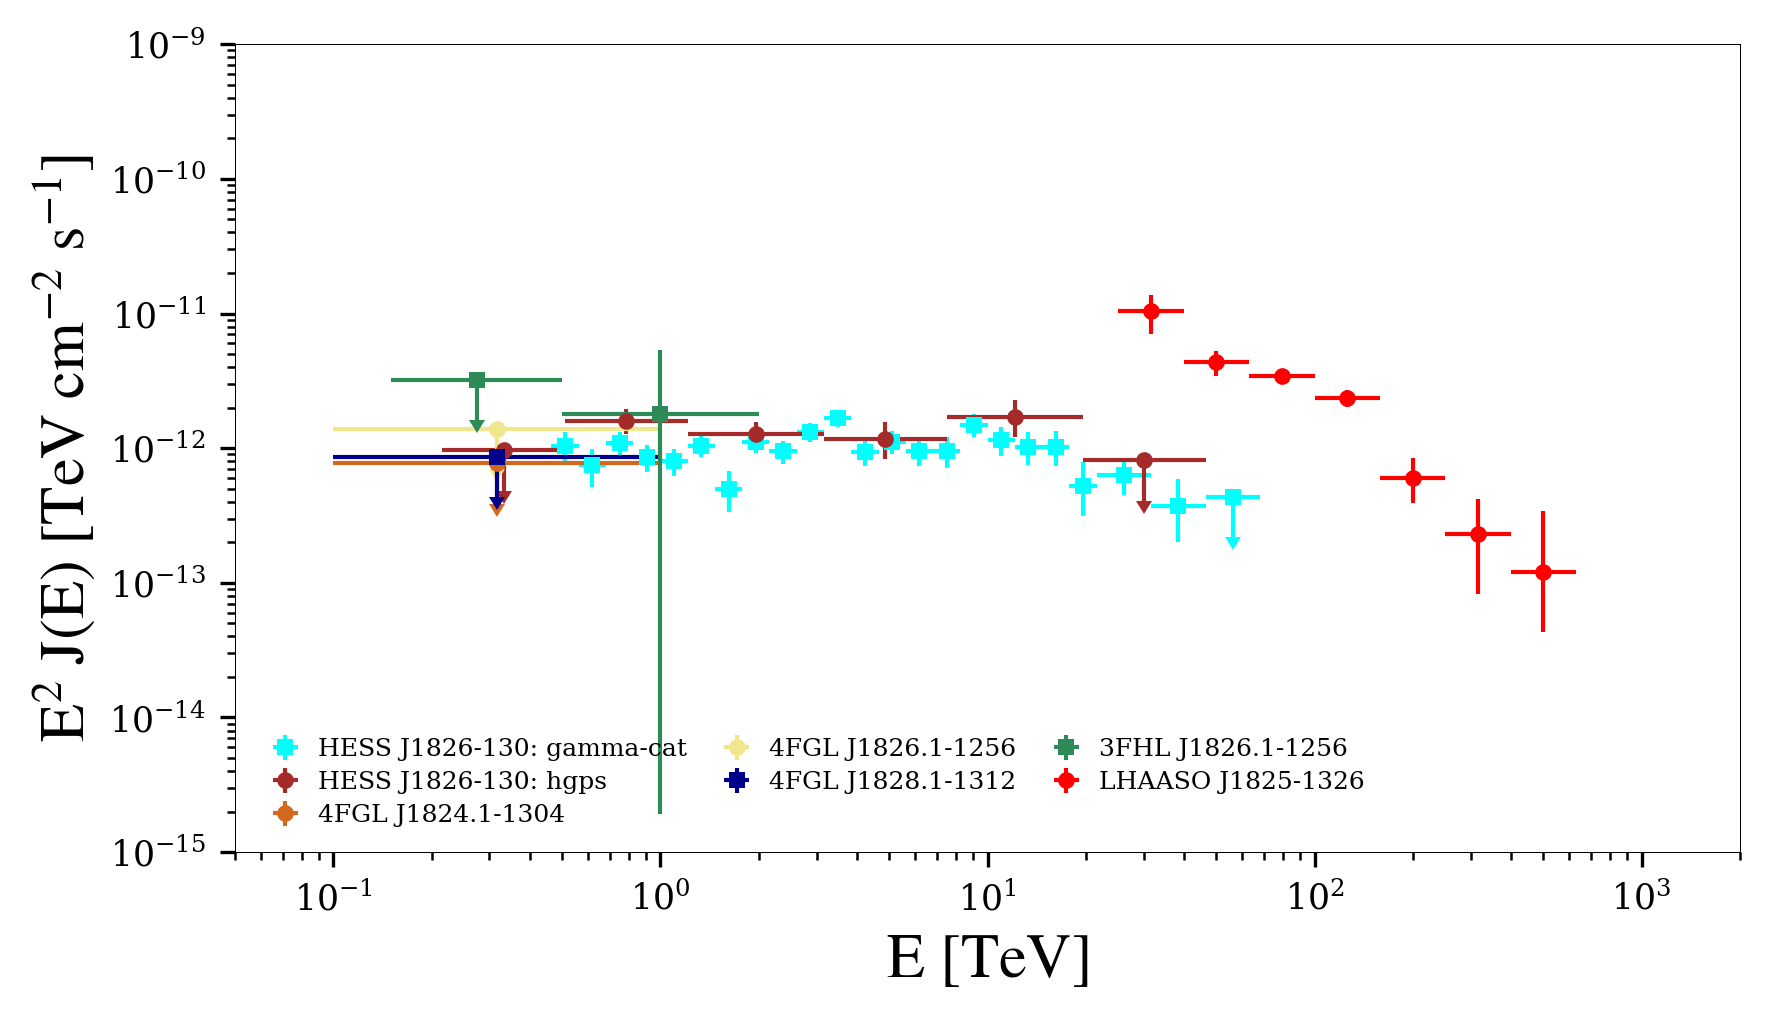

In [46]:
show_SED(
    datasets=datasets, 
#     models=analysis.models,
    leg_style=leg_style,
    plot_limits=plot_limits)

# Flux point fitting

In [47]:
from gammapy.modeling import Fit
from gammapy.catalog import CATALOG_REGISTRY

In [48]:
catalog_cls = CATALOG_REGISTRY.get_cls("hgps")()
counterpart_name = 'HESS J1826-130'

counterpart_TeV =  catalog_cls[counterpart_name]
print(counterpart_TeV.info())
associations = counterpart_TeV.associations
display(associations)


*** Basic info ***

Catalog row index (zero-based) : 55
Source name          : HESS J1826-130
Analysis reference   : HGPS
Source class         : Unid
Identified object    : --
Gamma-Cat id         : 161


*** Info from map analysis ***

RA                   :  276.509 deg = 18h26m02s
DEC                  :  -13.017 deg = -13d01m03s
GLON                 :   18.477 +/- 0.028 deg
GLAT                 :   -0.389 +/- 0.027 deg
Position Error (68%) : 0.060 deg
Position Error (95%) : 0.097 deg
ROI number           : 6
Spatial model        : Gaussian
Spatial components   : HGPSC 068
TS                   : 88.7
sqrt(TS)             : 9.4
Size                 : 0.152 +/- 0.021 (UL: 0.000) deg
R70                  : 0.249 deg
RSpec                : 0.249 deg
Total model excess   : 453.8
Excess in RSpec      : 541.8
Model Excess in RSpec : 517.1
Background in RSpec  : 1100.2
Livetime             : 83.2 hours
Energy threshold     : 0.40 TeV
Source flux (>1 TeV) : (0.861 +/- 0.167) x 10^-12 cm^-2 s

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/hess.py:286: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ss += "{:<20s} : {:.1f}\n".format("TS ECPL over PL", val)
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/hess.py:376: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ss += "{:<20s} : {:.2f} +/- {:.2f}\n".format("ECPL Index", val, err)
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/hess.py:384: RuntimeWarning: invalid value encountered in scalar divide
  err = err / val**2
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/hess.py:385: RuntimeWarning: divide by zero encountered in scalar divide
  val = 1.0 / val


Source_Name,Association_Catalog,Association_Name,Separation
,,,deg
bytes16,bytes5,bytes21,float32
HESS J1826-130,3FGL,3FGL J1826.1-1256,0.079490
HESS J1826-130,SNR,G18.6-0.2,0.186287
HESS J1826-130,PWN,G18.5-0.4,0.035266
HESS J1826-130,PSR,J1826-1256,0.079310


In [49]:
print(model)

SkyModel

  Name                      : likelihood fit-ecpl
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      2.000   +/-    0.00             
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (TeV s cm2)
    reference             (frozen):     10.000       TeV         
    lambda_                       :      0.100   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   




In [50]:
display(model.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,int64,float64,float64,bool,bool,str1
spectral,index,2.0000e+00,,0.000e+00,nan,nan,False,False,
spectral,amplitude,1.0000e-12,TeV-1 s-1 cm-2,0.000e+00,nan,nan,False,True,
spectral,reference,1.0000e+01,TeV,0.000e+00,nan,nan,True,False,
spectral,lambda_,1.0000e-01,TeV-1,0.000e+00,nan,nan,False,False,
spectral,alpha,1.0000e+00,,0.000e+00,nan,nan,True,False,


In [51]:
datasets.models = model
print(datasets)

Datasets
--------

Dataset 0: 

  Type       : FluxPointsDataset
  Name       : HESS J1826-130: gamma-cat
  Instrument : 
  Models     : ['likelihood fit-ecpl']

Dataset 1: 

  Type       : FluxPointsDataset
  Name       : HESS J1826-130: hgps
  Instrument : 
  Models     : ['likelihood fit-ecpl']

Dataset 2: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1824.1-1304
  Instrument : 
  Models     : ['likelihood fit-ecpl']

Dataset 3: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1826.1-1256
  Instrument : 
  Models     : ['likelihood fit-ecpl']

Dataset 4: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1828.1-1312
  Instrument : 
  Models     : ['likelihood fit-ecpl']

Dataset 5: 

  Type       : FluxPointsDataset
  Name       : 3FHL J1826.1-1256
  Instrument : 
  Models     : ['likelihood fit-ecpl']

Dataset 6: 

  Type       : FluxPointsDataset
  Name       : LHAASO J1825-1326
  Instrument : 
  Models     : ['likelihood fit-ecpl']




In [52]:
fitter = Fit()
result_ecpl = fitter.run(datasets=datasets)

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/datasets/flux_points.py:291: RuntimeWarning: overflow encountered in square
  return ((data - model) / sigma.quantity[:, 0, 0]).to_value("") ** 2
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [53]:
display(result_ecpl.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,1.9433e+00,,3.890e-02,nan,nan,False,False,
spectral,amplitude,1.0919e-14,TeV-1 s-1 cm-2,6.752e-16,nan,nan,False,True,
spectral,reference,1.0000e+01,TeV,0.000e+00,nan,nan,True,False,
spectral,lambda_,3.5869e-03,TeV-1,9.350e-04,nan,nan,False,False,
spectral,alpha,1.0000e+00,,0.000e+00,nan,nan,True,False,


In [54]:
print(result_ecpl)

print(model)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully..
	nfev       : 456
	total stat : 131.91

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

SkyModel

  Name                      : likelihood fit-ecpl
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      1.943   +/-    0.04             
    amplitude                     :   1.09e-14   +/- 6.8e-16 1 / (TeV s cm2)
    reference             (frozen):     10.000       TeV         
    lambda_                       :      0.004   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   




In [55]:
leg_style = set_leg_style_models(models_names=model_name,
    leg_style=leg_style)

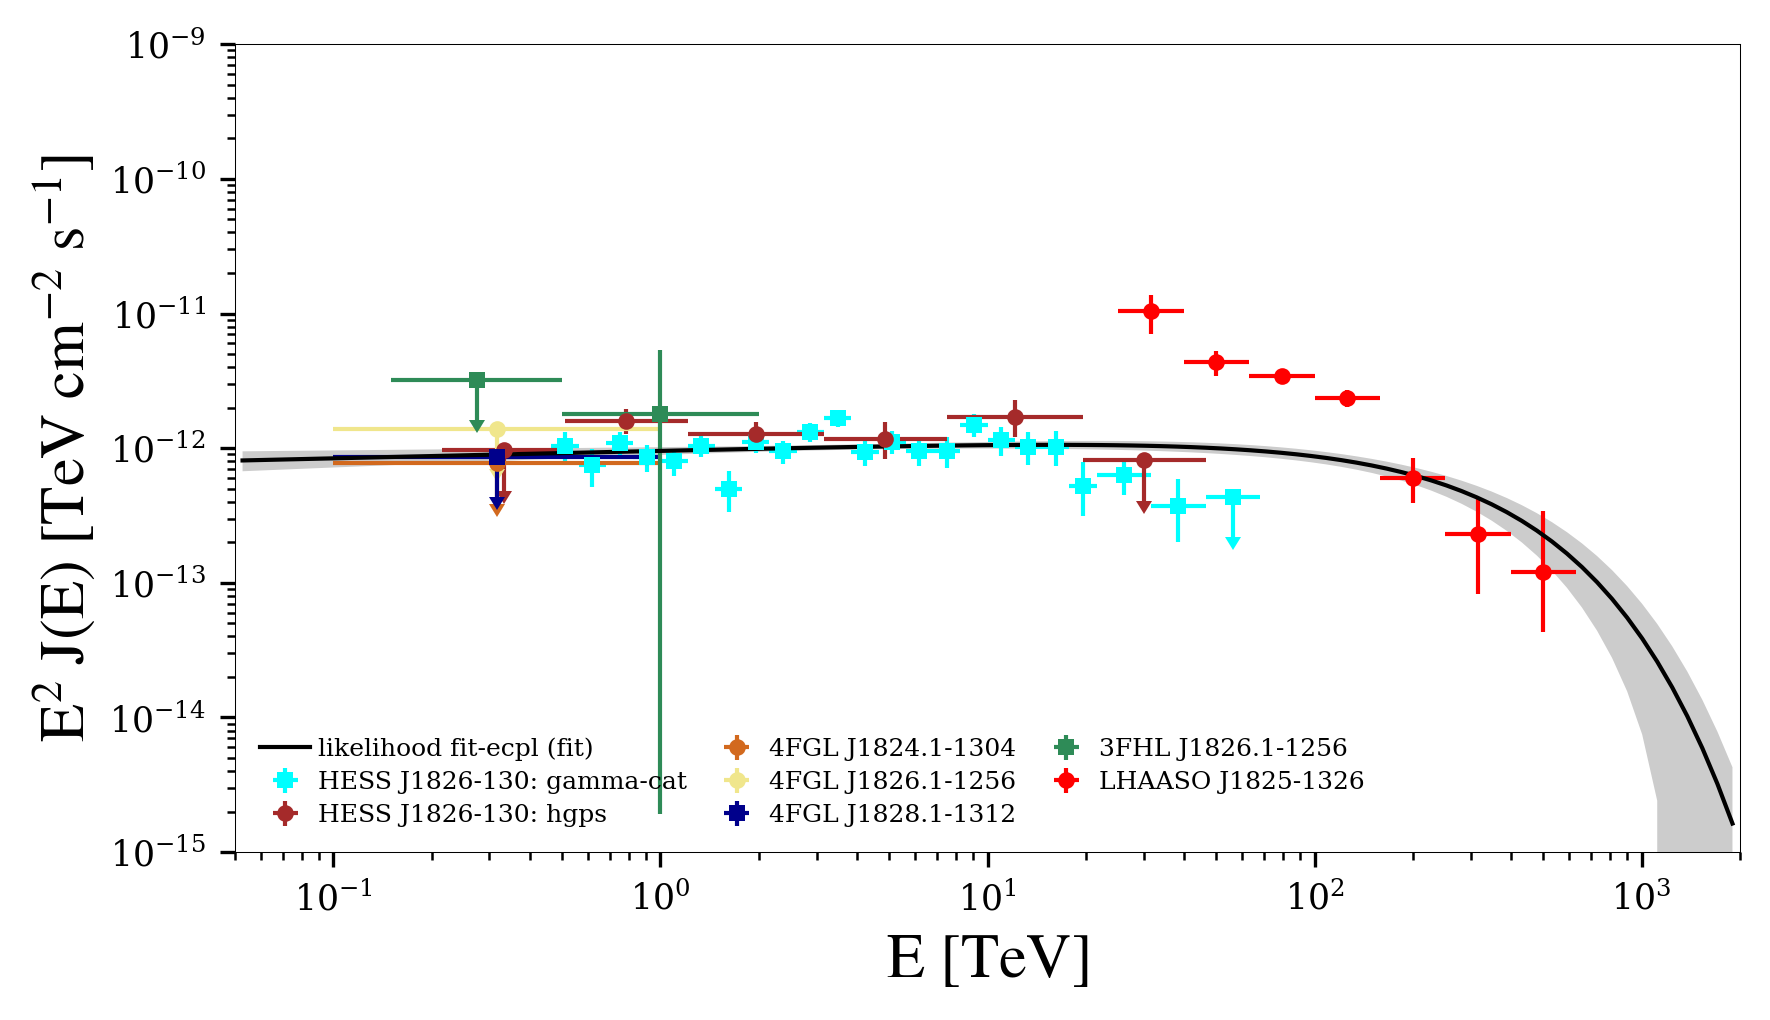

In [56]:
show_SED(
    datasets=datasets, 
    models=[model],
    leg_style=leg_style,
    plot_limits=plot_limits)

In [57]:
models.append(model)

In [58]:
analysis.datasets = datasets
analysis.models = models

In [59]:
print(analysis.models)

Models

Component 0: SkyModel

  Name                      : likelihood fit-ecpl
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      1.943   +/-    0.04             
    amplitude                     :   1.09e-14   +/- 6.8e-16 1 / (TeV s cm2)
    reference             (frozen):     10.000       TeV         
    lambda_                       :      0.004   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   




In [60]:
print(analysis.models)

Models

Component 0: SkyModel

  Name                      : likelihood fit-ecpl
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      1.943   +/-    0.04             
    amplitude                     :   1.09e-14   +/- 6.8e-16 1 / (TeV s cm2)
    reference             (frozen):     10.000       TeV         
    lambda_                       :      0.004   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   




In [61]:
print(analysis.models)

Models

Component 0: SkyModel

  Name                      : likelihood fit-ecpl
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      1.943   +/-    0.04             
    amplitude                     :   1.09e-14   +/- 6.8e-16 1 / (TeV s cm2)
    reference             (frozen):     10.000       TeV         
    lambda_                       :      0.004   +/-    0.00 1 / TeV     
    alpha                 (frozen):      1.000                   




In [62]:
display(model.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,1.9433e+00,,3.890e-02,nan,nan,False,False,
spectral,amplitude,1.0919e-14,TeV-1 s-1 cm-2,6.752e-16,nan,nan,False,True,
spectral,reference,1.0000e+01,TeV,0.000e+00,nan,nan,True,False,
spectral,lambda_,3.5869e-03,TeV-1,9.350e-04,nan,nan,False,False,
spectral,alpha,1.0000e+00,,0.000e+00,nan,nan,True,False,


In [63]:
from pathlib import Path
from feupy.utils.scripts import pickling, unpickling


In [64]:
path = Path("../analysis/PSR_J1826-1256")
path.mkdir(exist_ok=True)
filename = path / "cntrp_1"
pickling(analysis, filename)

In [65]:
display(model.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,1.9433e+00,,3.890e-02,nan,nan,False,False,
spectral,amplitude,1.0919e-14,TeV-1 s-1 cm-2,6.752e-16,nan,nan,False,True,
spectral,reference,1.0000e+01,TeV,0.000e+00,nan,nan,True,False,
spectral,lambda_,3.5869e-03,TeV-1,9.350e-04,nan,nan,False,False,
spectral,alpha,1.0000e+00,,0.000e+00,nan,nan,True,False,
